In [2]:
import tensorflow as tf
import random 
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

In [3]:
#import Fashion MNIST data using Keras
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
#Data Normalization between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

**Reshaping training data to be = (60000,28,28,1) instead of (60000, 28, 28)**

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
len(X_train)

60000

AttributeError: ignored

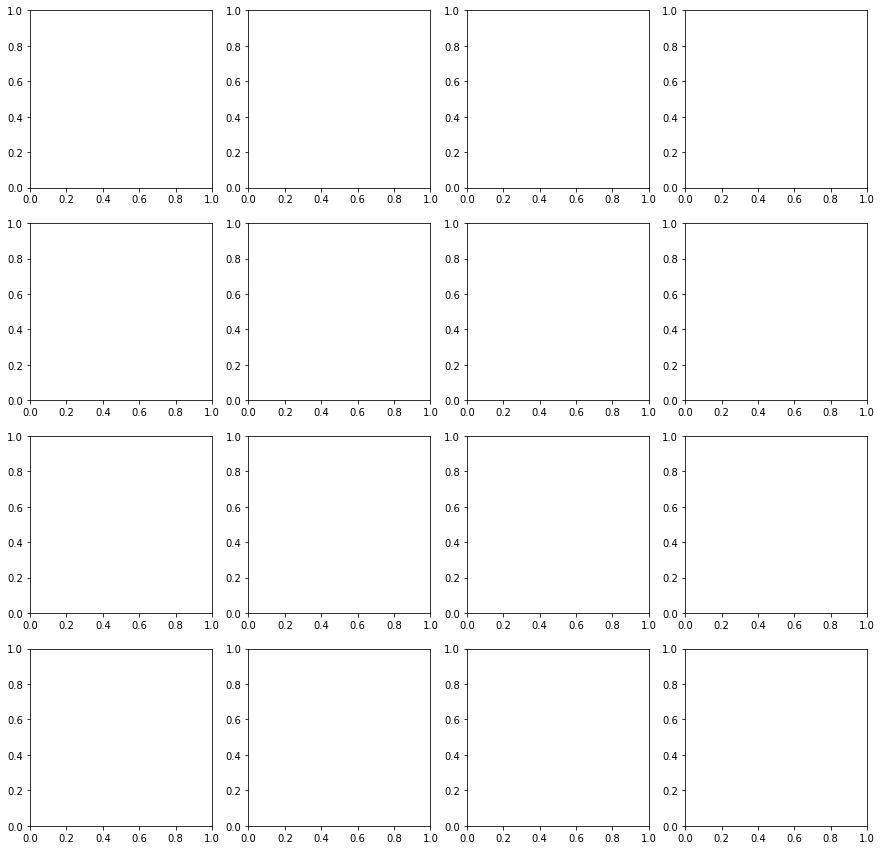

In [21]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index].reshape(28,28))
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [24]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(2,2))

cnn.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

cnn.add(tf.keras.layers.Flatten()) 

cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                495680    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [28]:
epochs = 5

cnn.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=epochs)

test_loss, test_acc = cnn.evaluate(X_test,y_test)
print('\nTest accuracy: {}'.format(test_acc))

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.8138 - accuracy: 0.6963
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5366 - accuracy: 0.7976
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4672 - accuracy: 0.8291
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4231 - accuracy: 0.8488
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.4150 - accuracy: 0.8571

Test accuracy: 0.8571000099182129


In [30]:
Model_Directory = tempfile.gettempdir()

In [31]:
Model_Directory

'/tmp'

In [32]:
version = 1

In [33]:
export_path = os.path.join(Model_Directory, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [47]:
if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up.\n')
    !rm -r {export_path}

tf.saved_model.save(
    tf.distribute.Strategy,
    export_path,
    input = {'input_image': cnn.input}, 
    outputs = {i.name:i for i in cnn.outputs}
)

TypeError: ignored

In [50]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -
!apt update

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   159k      0 --:--:-- --:--:-- --:--:--  159k
OK
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://storage.go

In [52]:
!apt-get install tensor-flow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tensor-flow-model-server


In [60]:
os.environ["MODEL_DIR"] = Model_Directory

In [65]:
%%bash --bg 
nohup tensorflow_model_server \ 
    --rest_api_port = 8501 \ 
    --model_name = fashion_mnist_model \ 
    #--MODEL_DIR = "${MODEL_DIR}" > server.log 2>&1

Starting job # 6 in a separate thread.


In [66]:
!tail server.log

bash: line 4: --MODEL_DIR: command not found


In [67]:
def show(idx, title):
    plt.figure()
    plt.imshow(X_test[idx].reshape(28,28))
    plt.title('\n\n{}'.format(title), fontdict={'size':15})

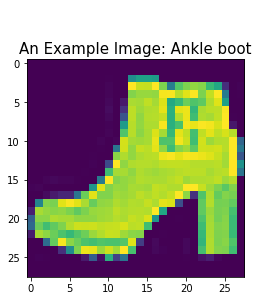

In [69]:
rando = random.randint(0,len(X_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))

In [70]:
 #Lets create a JSON object and make 3 inference requests 
 data = json.dumps({"signature_name":"serving_default", "instances":X_test[0:3].tolist()})
 print('Data: {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances":


In [71]:
 !pip install -q requests

In [72]:
import requests

In [73]:
headers = {"content-type":"application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

ConnectionError: ignored

In [75]:
show(0, 'the model thought this was a {} (class{}), and it was actually a {} (class {})'. format(class_names[np.argmax(predictions[0])], y_test[0], class_names[np.argmax(predictions[0])], y_test[0]))

NameError: ignored

In [77]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_models/version/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
    show(i, 'the model shows this as a {} (class{}), and this was actually a {} (class{})'.format(
        class_names[np.argmax(predictions[i])], y_test[i], class_names[np.argmax(predictions[i])], y_test[i]))
    

ConnectionError: ignored